### Analyze 'inverse' option

Shows that a perfect MP-RMT matrix with Q=1 fits a PL with alpha<<2, =1.5 (with the Clauser estimator)

In [1]:
import torch
import torch.nn as nn

class SingleLayerModel(nn.Module):
    def __init__(self, weights):
        super(SingleLayerModel, self).__init__()
        
        # Infer dimensions from weights
        output_dim, input_dim = weights.shape

        # Initialize the linear layer without bias
        self.linear = nn.Linear(in_features=input_dim, out_features=output_dim, bias=False)

        # Set custom weights
        self.linear.weight = nn.Parameter(torch.tensor(weights, dtype=torch.float))

    def forward(self, x):
        # Forward pass through the linear layer
        return self.linear(x)


In [2]:

W = torch.randn(1000, 1000) 

model = SingleLayerModel(weights=W)


/var/folders/9q/8zt1k19s11j8ypmkfsv8qvyr0000gn/T/ipykernel_82452/189660674.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.linear.weight = nn.Parameter(torch.tensor(weights, dtype=torch.float))


In [3]:
import weightwatcher as ww
print(ww.__version__)

watcher = ww.WeightWatcher()

watcher.describe(model=model)

PyTorch is available but CUDA is not. Defaulting to NumPy for SVD
Import error , reetting to svd accurate methods


0.7.4.8


,layer_id,name,M,N,Q,layer_type,longname,num_evals,rf
0,1,Linear,1000,1000,1.0,dense,linear,1000,1


vectors False
detX False
vectors False
detX False


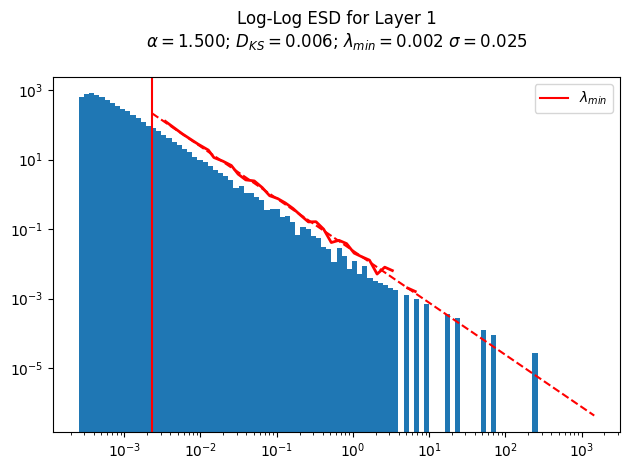

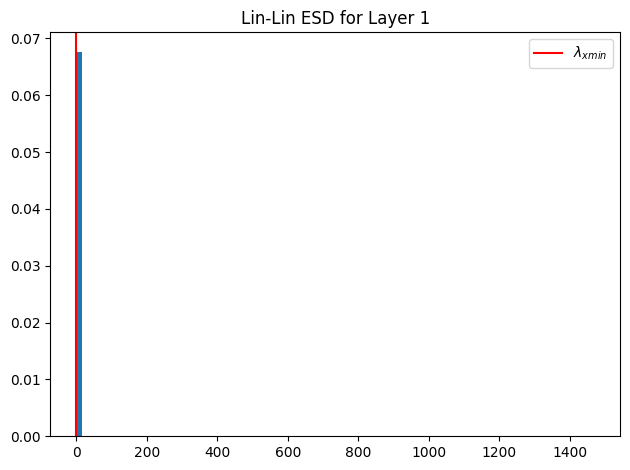

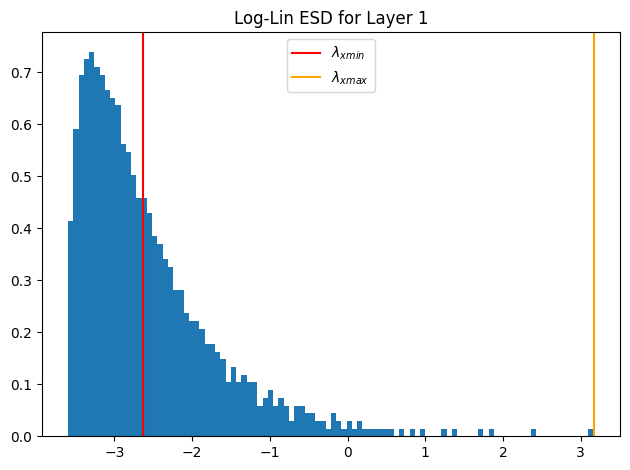

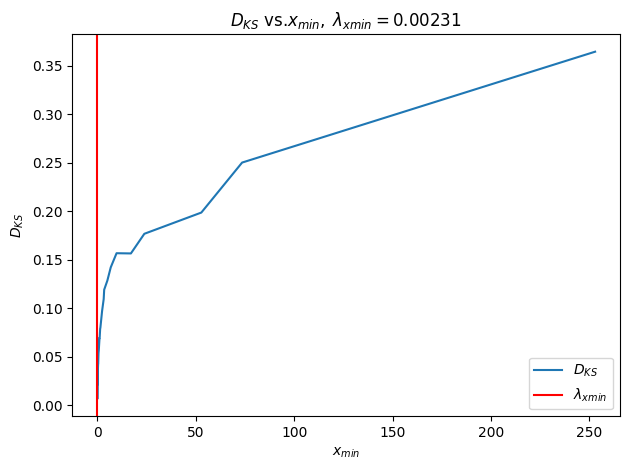

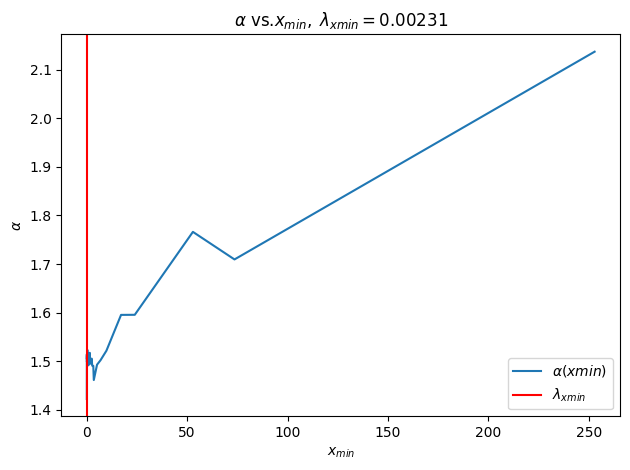

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,1,Linear,0.006291,1000,1000,1.0,1.499953,4.750234,0.148536,True,...,0.024571,1468.659514,1.32886,success,62.776689,0.026094,over-trained,0,1468.659514,0.00231


<Figure size 640x480 with 0 Axes>

In [4]:
watcher.analyze(plot=True, inverse=True)